In [1]:
import antpodTest as apd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
import rasterstats

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
x1 = rio.open("C:\\Users\\prkaa\\Downloads\\EVI.tif")
x2 = rio.open("C:\\Users\\prkaa\\Downloads\\NDVI.tif")

In [3]:
ndvi = x1.read(1)
evi = x2.read(1)

In [4]:
geodf = gpd.read_file("S:\\antpodGIS\\shapefiles\\APX00000.shp")
geodf = apd.setGeoDFCRS(geodf, epsg=4326)

C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
prodList = ['NDVI']
geodf = apd.fillMeanIndexValues(x1, geodf, prodList)

C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [6]:
prodList = ['EVI']
geodf = apd.fillMeanIndexValues(x2, geodf, prodList)

In [7]:
geodf.dropna()

,id,left,top,right,bottom,id_2,geometry,meanNDVI,meanEVI
0,22.0,80.061601,12.813288,80.062101,12.812788,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.507787,0.303697
1,23.0,80.061601,12.812788,80.062101,12.812288,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.988353,0.489757
2,24.0,80.061601,12.812288,80.062101,12.811788,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",1.203091,0.572853
3,25.0,80.061601,12.811788,80.062101,12.811288,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.916803,0.469807
4,26.0,80.061601,12.811288,80.062101,12.810788,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.924689,0.461120
...,...,...,...,...,...,...,...,...,...
889,1208.0,80.076601,12.820288,80.077101,12.819788,1,"POLYGON ((80.07660 12.82029, 80.07703 12.82029...",-0.060300,0.376544
890,1209.0,80.076601,12.819788,80.077101,12.819288,1,"POLYGON ((80.07660 12.81979, 80.07700 12.81979...",0.547264,0.208081
891,1210.0,80.076601,12.819288,80.077101,12.818788,1,"POLYGON ((80.07660 12.81929, 80.07697 12.81929...",1.149819,0.472178
892,1211.0,80.076601,12.818788,80.077101,12.818288,1,"POLYGON ((80.07660 12.81879, 80.07694 12.81879...",0.887448,0.414808


C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


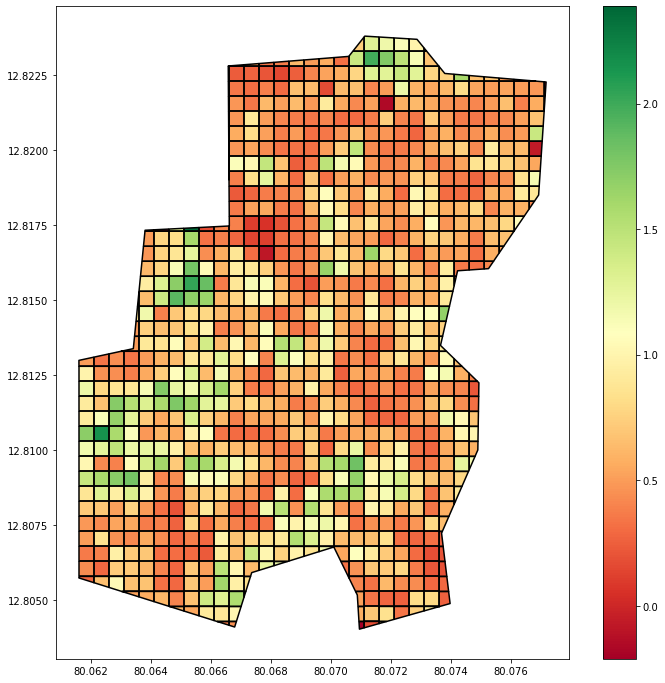

In [8]:
geodf.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
geodf.boundary.plot(ax=plt.gca(),color='k')

C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


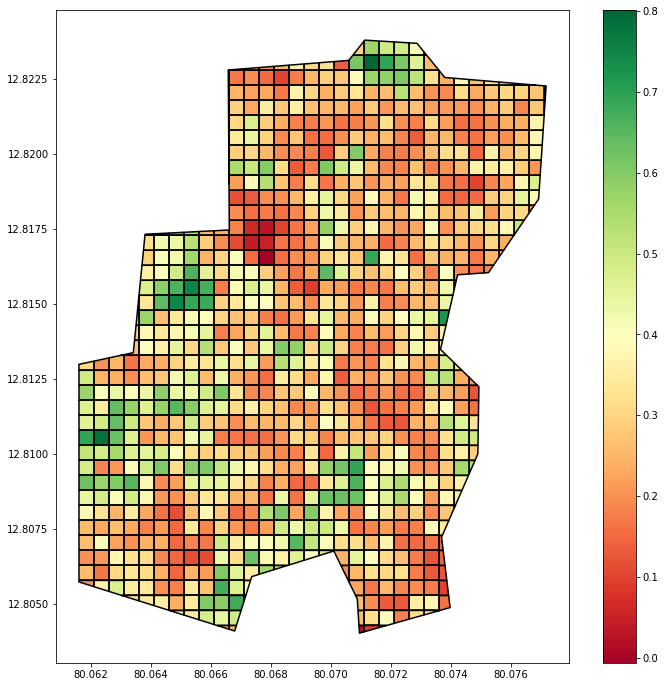

In [9]:
geodf.plot('meanEVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
geodf.boundary.plot(ax=plt.gca(),color='k')

In [12]:
geodf.describe()

,id,left,top,right,bottom,id_2,meanNDVI,meanEVI
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.0,879.000000,879.000000
mean,619.966518,80.069092,12.813947,80.069592,12.813447,1.0,0.703479,0.316711
std,302.663596,0.003827,0.005333,0.003827,0.005333,0.0,0.380935,0.138895
min,22.000000,80.061601,12.804288,80.062101,12.803788,1.0,-0.211151,-0.006172
25%,383.750000,80.066101,12.809288,80.066601,12.808788,1.0,0.417642,0.207424
50%,628.500000,80.069101,12.813788,80.069601,12.813288,1.0,0.607906,0.286536
75%,867.250000,80.072101,12.818288,80.072601,12.817788,1.0,0.902579,0.401940
max,1245.000000,80.077101,12.823788,80.077601,12.823288,1.0,2.387208,0.800795


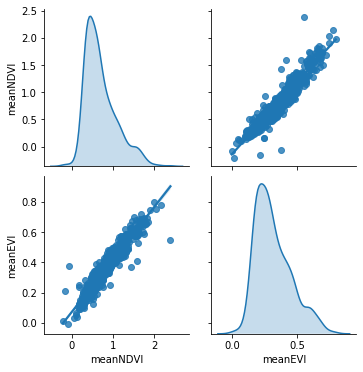

In [11]:
var = ['meanNDVI','meanEVI']
_ = sns.pairplot(geodf[var], kind='reg', diag_kind='kde')